# **Fast Neural Style Transfer**

This notebook implements Neural Style Transfer using a [Tensorflow Hub model](https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2) that is available.

**Imports**

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import os

### **Download and preprocess the images**

In [2]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
# Images directory
directory_images = "/content/drive/MyDrive/images/fast_neural_style_transfer"

directory_fast_nst = os.path.join(directory_images, "swan_kandinsky")
os.makedirs(directory_fast_nst, exist_ok=True)

In [4]:
# Download images
content_path = "swan.jpg"
style_path = "kandinsky.jpg"

!wget -q https://cdn.pixabay.com/photo/2017/02/28/23/00/swan-2107052_1280.jpg -O $content_path
!wget -q https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg -O $style_path

**Function to load an image and limit its maximum dimension to max_dim (512) pixels**

In [5]:
def preprocessing(path, max_dim=512):
  img = tf.io.read_file(path)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  scale = max_dim / max(shape)
  new_shape = tf.cast(shape * scale, tf.int32)
  img = tf.image.resize(img, new_shape)

  return img[None, :]

**Function to display and save the images**

In [16]:
def show_and_save_images(content_image, style_image, gen_image=None,
                         save_gen=False, save_img=False, titles=[""]*3):

  content_image = tf.squeeze(content_image)
  style_image = tf.squeeze(style_image)

  if gen_image is not None:
    gen_image = tf.squeeze(gen_image)
    if save_gen:
      plt.imshow(gen_image)
      plt.axis("off")
      plt.savefig(os.path.join(directory_fast_nst, f"gen_image.png"), transparent=True)
      plt.close()

    fig, ax = plt.subplots(1, 3, figsize=(15, 4))
    ax[2].imshow(gen_image)
    ax[2].set_title(titles[2])
    ax[2].axis("off")

  else:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

  ax[0].imshow(content_image)
  ax[0].set_title(titles[0])
  ax[0].axis("off")

  ax[1].imshow(style_image)
  ax[1].set_title(titles[1])
  ax[1].axis("off")

  if save_img:
    plt.savefig(os.path.join(directory_fast_nst, f"image.png"), transparent=True)

  plt.show()

In [7]:
content_image = preprocessing(content_path)
style_image = preprocessing(style_path)

content_image.shape, style_image.shape

(TensorShape([1, 292, 512, 3]), TensorShape([1, 336, 512, 3]))

### **Download the model**

In [9]:
model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

### **Stylize the content image**

In [14]:
gen_image = model(content_image, style_image)[0]
gen_image.shape

TensorShape([1, 292, 512, 3])

In [15]:
gen_image.numpy().min(), gen_image.numpy().max()

(0.016178682, 0.9936855)

In [17]:
titles = ["Content Image", "Style Image", "Generated Image"]

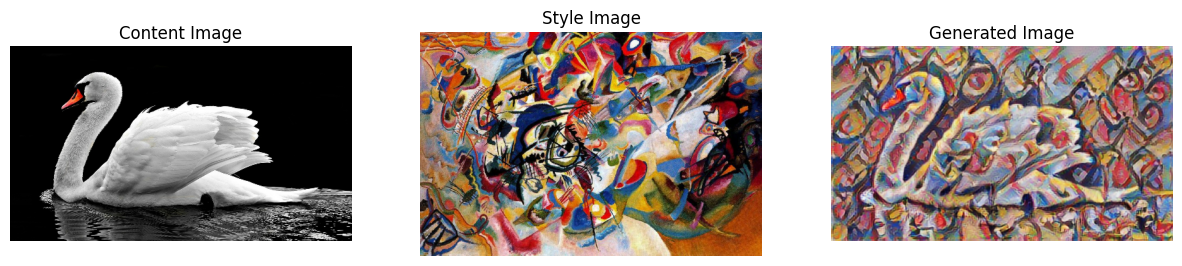

In [18]:
show_and_save_images(content_image, style_image, gen_image,
                     save_gen=True, save_img=True, titles=titles)

### **Testing with more images**

**The Persistence of Memory <-- The Starry Night**

In [19]:
directory_fast_nst = os.path.join(directory_images, "persistence_memory_starry_night")
os.makedirs(directory_fast_nst, exist_ok=True)

In [20]:
content_path = "persistence_memory.jpg"
style_path = "starry_night.jpg"

!wget -q https://e00-expansion.uecdn.es/assets/multimedia/imagenes/2022/03/16/16474305262593.jpg -O $content_path
!wget -q https://e00-expansion.uecdn.es/assets/multimedia/imagenes/2022/03/16/16474297505881.jpg -O $style_path

In [21]:
content_image = preprocessing(content_path)
style_image = preprocessing(style_path)

content_image.shape, style_image.shape

(TensorShape([1, 341, 511, 3]), TensorShape([1, 341, 511, 3]))

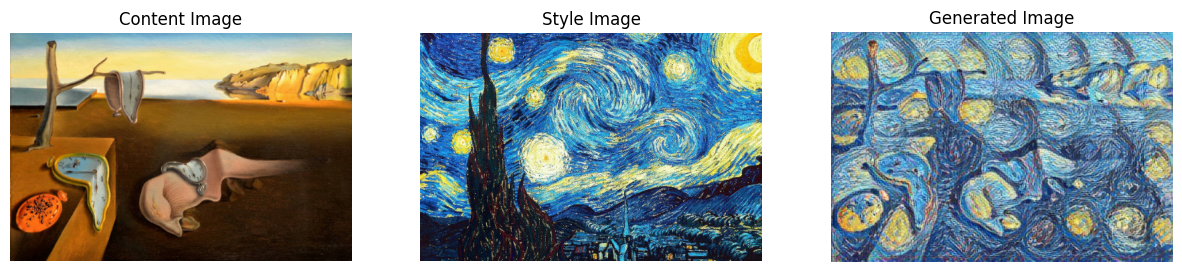

In [23]:
gen_image = model(content_image, style_image)[0]

show_and_save_images(content_image, style_image, gen_image,
                     save_gen=True, save_img=True, titles=titles)

**Mona Lisa <-- Cubism**

In [24]:
directory_fast_nst = os.path.join(directory_images, "mona_lisa_cubism")
os.makedirs(directory_fast_nst, exist_ok=True)

In [25]:
content_path = "mona_lisa.jpg"
style_path = "cubism.jpg"

!wget -q https://mott.pe/noticias/wp-content/uploads/2018/01/Conoce-la-historia-de-%E2%80%9Cla-Mona-lisa%E2%80%9D-pintura-de-Leonardo-da-Vinci-destacada.jpg -O $content_path
!wget -q https://www.singulart.com/blog/wp-content/uploads/2023/11/Juan-Gris-cubism-1140x760.jpg -O $style_path

In [26]:
content_image = preprocessing(content_path)
style_image = preprocessing(style_path)

content_image.shape, style_image.shape

(TensorShape([1, 341, 512, 3]), TensorShape([1, 341, 512, 3]))

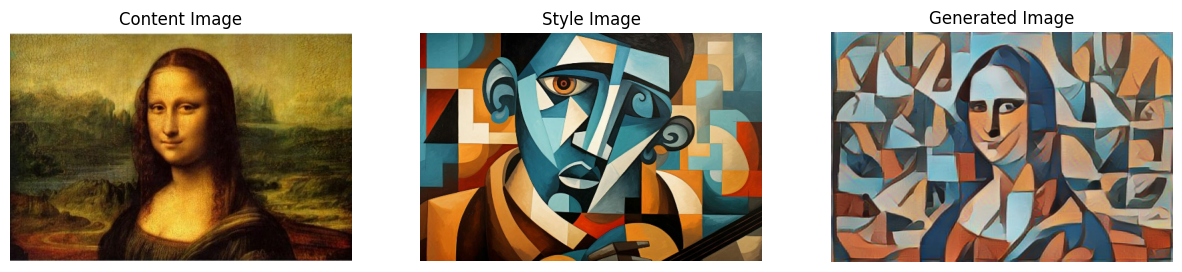

In [27]:
gen_image = model(content_image, style_image)[0]

show_and_save_images(content_image, style_image, gen_image,
                     save_gen=True, save_img=True, titles=titles)